# Basics of Biostatistic

Topics
1. Population vs Sample
2. Overview of Descriptive and Inferential Statistics
3. Different data types: Continuous, Discrete, Rank/Ordinal and Categorical

We will use the [UCI Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)

*   920 patients at risk of coronary diseases in 4 medical centers
*   14 attributes (columns)

In [1]:
# Load the dataset
file_path <- "/content/heart_disease_uci.csv"
df <- read.csv(file_path)
head(df)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<lgl>,<chr>,<int>,<lgl>,<dbl>,<chr>,<int>,<chr>,<int>
1,1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
4,4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0
5,5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0
6,6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0



Attributes
* id: Unique identifier for each patient
* age: Age of the patient in years
* sex: Sex of the patient (Male/Female)
* dataset: Place of study
* cp (chest pain type): Includes typical angina, atypical angina, non-anginal, asymptomatic
* trestbps (resting blood pressure): Resting blood pressure in mm Hg on admission to the hospital
* chol (serum cholesterol): Serum cholesterol in mg/dl
* fbs (fasting blood sugar): If fasting blood sugar > 120 mg/dl (True/False)
* restecg (resting electrocardiographic results): Includes normal, stt abnormality, lv hypertrophy
* thalach: Maximum heart rate achieved
* exang: Exercise-induced angina (Categorical, binary: True/False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: The slope of the peak exercise ST segment
* ca: Number of major vessels (0-3) colored by fluoroscopy
* thal: Includes normal, fixed defect, reversible defect
* num: Diagnosis of heart disease (0-4, 0-no diagnosis, 1-4 different degree of heart disease)




---



## 1. Population vs Sample


In [4]:
# Let's consider the entire dataset as a population
mean_trestbps_whole <- mean(df$trestbps, na.rm = TRUE)
cat(sprintf("Mean resting blood pressure for the population: %.2f mm Hg", mean_trestbps_whole))


Mean resting blood pressure for the population: 132.13 mm Hg

In [5]:
# Let's consider the Switzerland sample
df_swiss <- subset(df, dataset == 'Switzerland')
mean_trestbps_swiss <- mean(df_swiss$trestbps, na.rm = TRUE)
cat(sprintf("Mean resting blood pressure for the Switzerland sample: %.2f mm Hg", mean_trestbps_swiss))

Mean resting blood pressure for the Switzerland sample: 130.21 mm Hg

---
## 2. Overview of Descriptive and Inferential Statistics





In [6]:
# Descriptive statistics is about summarizing a sample using mean, median
# mode, standard deviation etc.

summary(df)

       id             age            sex              dataset         
 Min.   :  1.0   Min.   :28.00   Length:920         Length:920        
 1st Qu.:230.8   1st Qu.:47.00   Class :character   Class :character  
 Median :460.5   Median :54.00   Mode  :character   Mode  :character  
 Mean   :460.5   Mean   :53.51                                        
 3rd Qu.:690.2   3rd Qu.:60.00                                        
 Max.   :920.0   Max.   :77.00                                        
                                                                      
      cp               trestbps          chol          fbs         
 Length:920         Min.   :  0.0   Min.   :  0.0   Mode :logical  
 Class :character   1st Qu.:120.0   1st Qu.:175.0   FALSE:692      
 Mode  :character   Median :130.0   Median :223.0   TRUE :138      
                    Mean   :132.1   Mean   :199.1   NA's :90       
                    3rd Qu.:140.0   3rd Qu.:268.0                  
                    Max.

In [8]:
# Inferential statistics is all about deducing whether the observed
# sample value (statistic) would likely occur in the population

# Let's compare cholestrol between patients with and without a diagnosis of
# heart disease in our sample. We will hypthesize that there exists
# no difference (null hypothesis)

group1 <- na.omit(df[df$num == 0, "chol"]) #Patients without a heart disease diagnosis

group2 <- na.omit(df[df$num > 0, "chol"]) #Patients with a heart disease diagnosis

# t-test
t_test_result <- t.test(group1, group2)
cat(sprintf("T-statistic: %.6f, P-value: %.6f", t_test_result$statistic, t_test_result$p.value))

T-statistic: 7.475643, P-value: 0.000000

A low p-value, often below 0.05 indicates that the probability that no difference exists between the two groups is very unlikely. Therefore we should reject our null hypothesis in favor of a alternative hypotheis which states that
the difference between two groups is likely in a broader population.



---



## 3. Types of Data/Measurements

Warning message:
“Removed 59 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 59 rows containing non-finite values (`stat_density()`).”


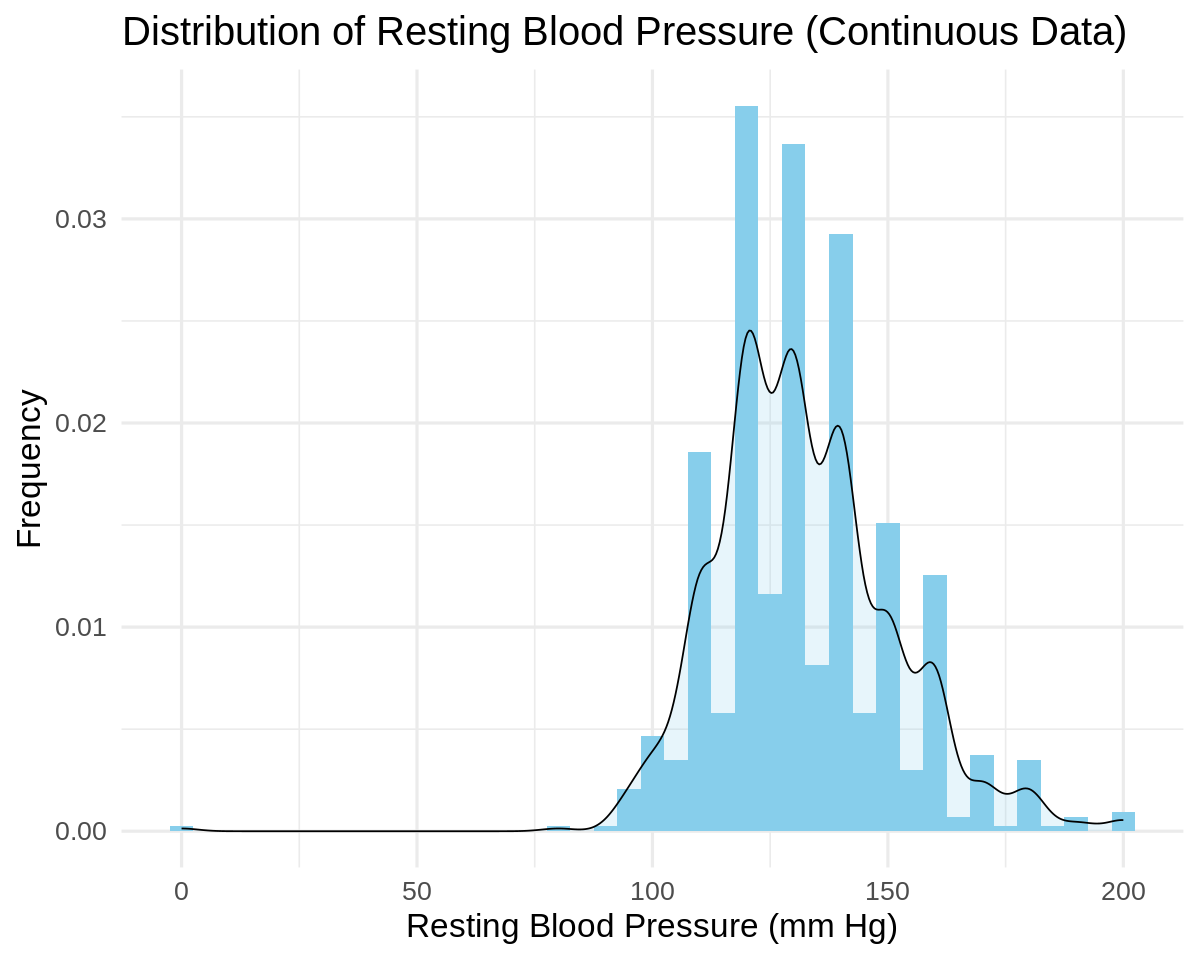

In [23]:
# Continuous: measurements that can vary infinitely between two ranges
# e.g. resting blood pressure (trestbps)
library(ggplot2)
options(repr.plot.width=10, repr.plot.height=8)

ggplot(df, aes(x = trestbps)) +
  geom_histogram(aes(y = ..density..), binwidth = 5, fill = "skyblue") +
  geom_density(alpha = .2, fill = "skyblue") +
  labs(title = "Distribution of Resting Blood Pressure (Continuous Data)",
       x = "Resting Blood Pressure (mm Hg)",
       y = "Frequency") +
  theme_minimal(base_size = 20)


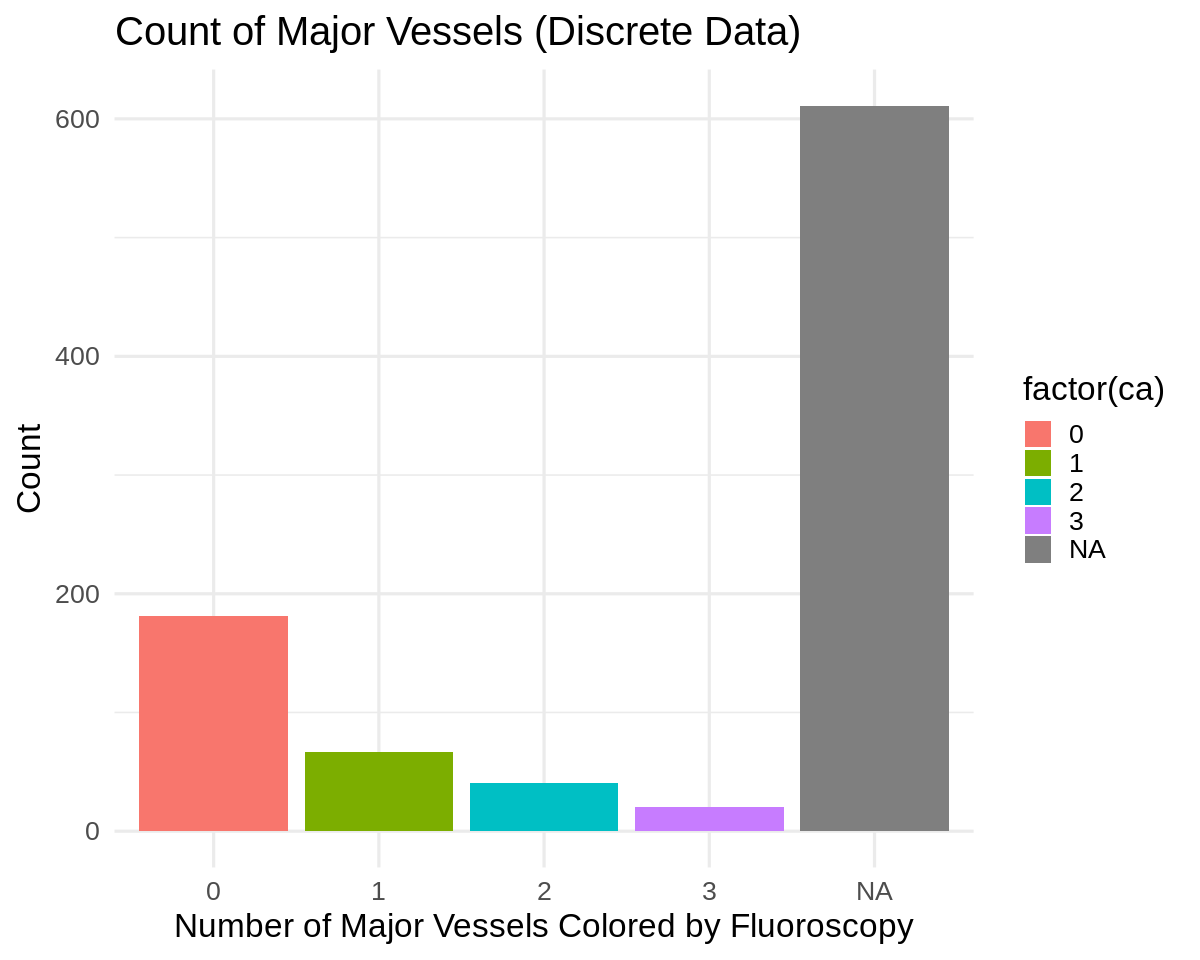

In [24]:
# Discrete: measurements that can take specific values
# e.g. The number of major vessels colred by Fluoroscopy (ca)

ggplot(df, aes(x = factor(ca), fill = factor(ca))) +
  geom_bar() +
  labs(title = "Count of Major Vessels (Discrete Data)",
       x = "Number of Major Vessels Colored by Fluoroscopy",
       y = "Count") +
  theme_minimal(base_size = 20)

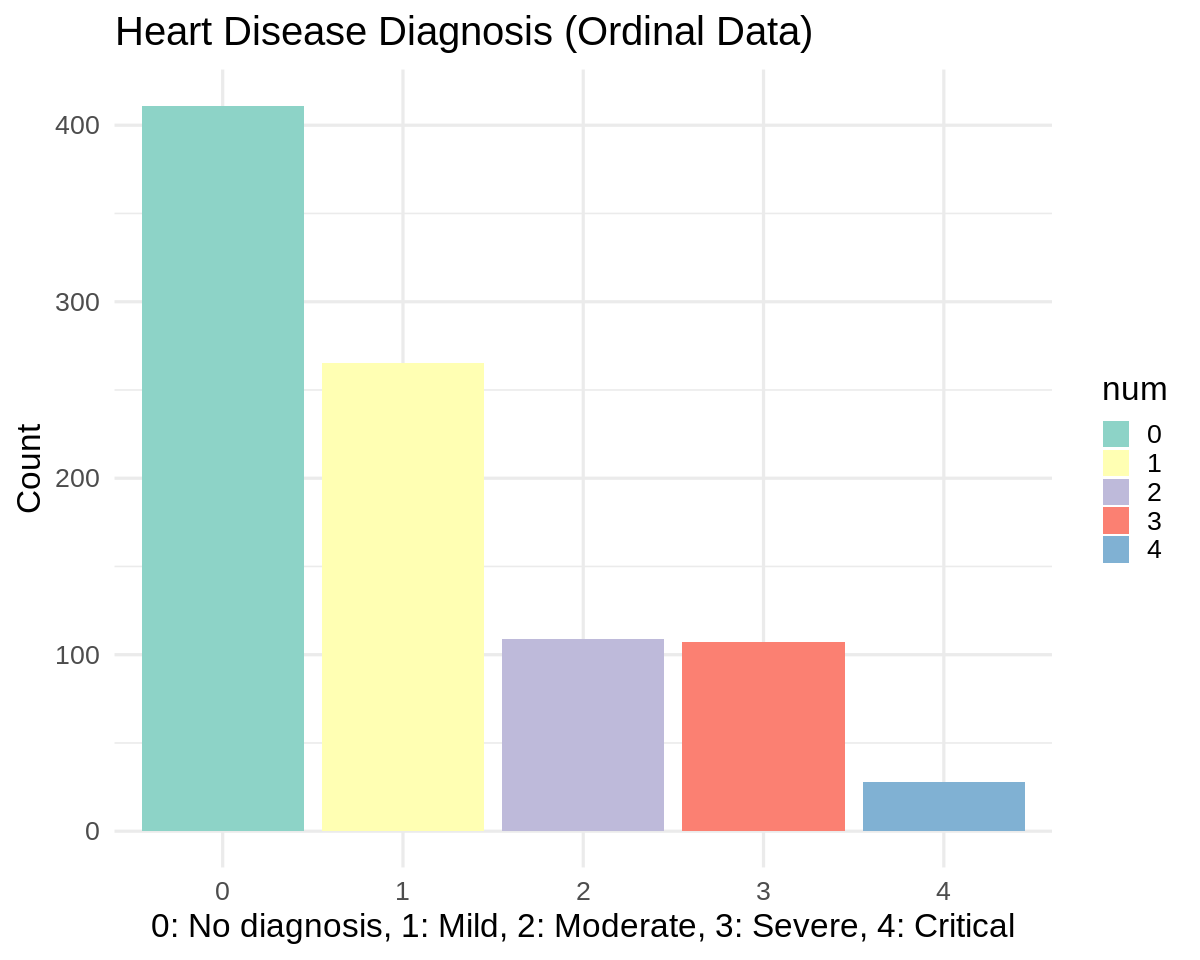

In [25]:
# Ordinal/Rank: measurement categories that have a certain order but the
# differences are not numerically defined
# e.g Diagnosis of heart diesease (num)

# Ensure 'num' is a factor with levels in the desired order
df$num <- factor(df$num, levels = sort(unique(df$num)))

ggplot(df, aes(x = num, fill = num)) +
  geom_bar() +
  scale_fill_brewer(palette="Set3") +  # Use a palette suitable for discrete data
  labs(title = 'Heart Disease Diagnosis (Ordinal Data)',
       x = '0: No diagnosis, 1: Mild, 2: Moderate, 3: Severe, 4: Critical',
       y = 'Count') +
  theme_minimal(base_size = 20)

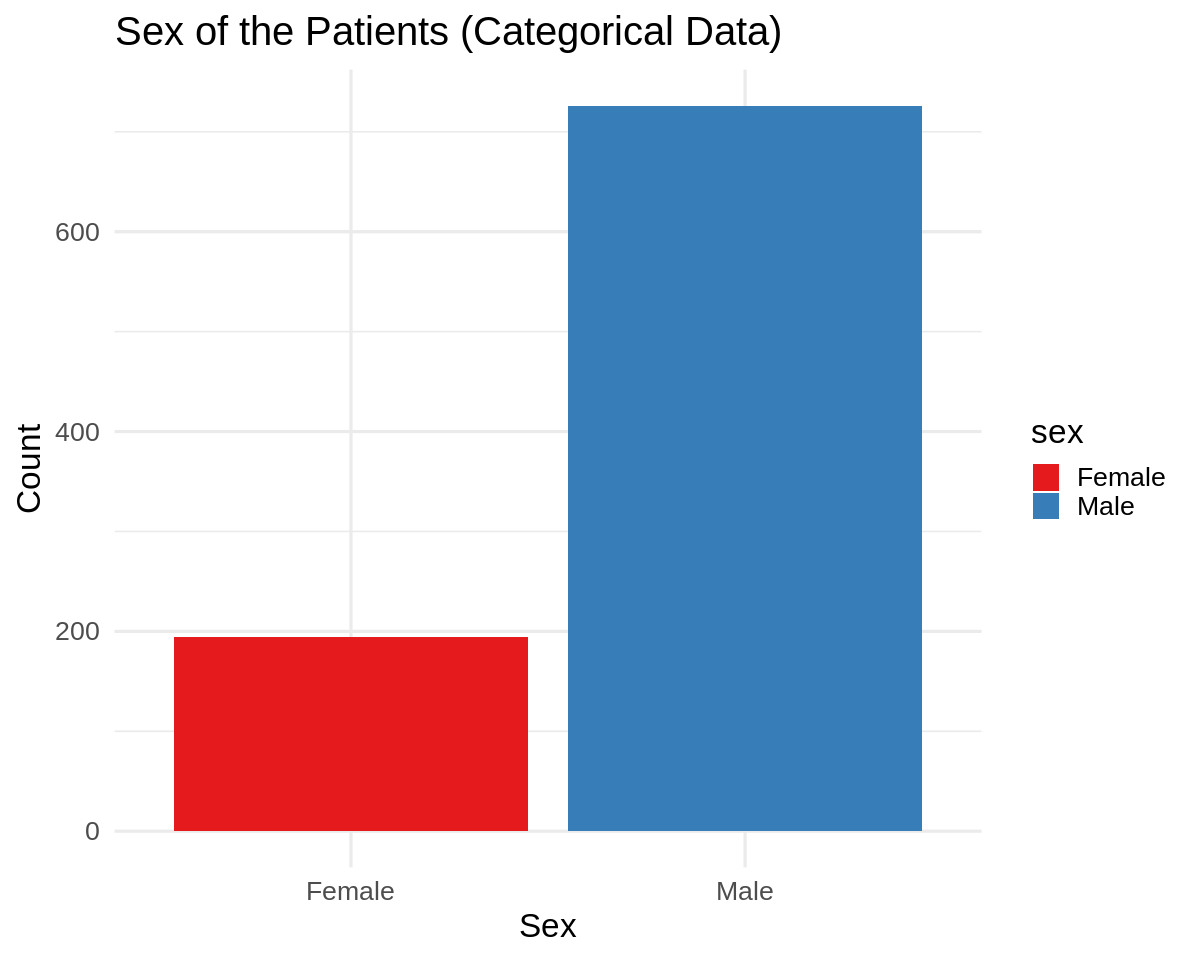

In [26]:
# Categorical: data with categories without any order
# e.g. sex of the patients (sex)

ggplot(df, aes(x = sex, fill = sex)) +
  geom_bar() +
  scale_fill_brewer(palette="Set1") +
  labs(title = 'Sex of the Patients (Categorical Data)',
       x = 'Sex',
       y = 'Count') +
  theme_minimal(base_size = 20)